In [77]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

notification_df = pd.read_csv('../data/notification_sequence.csv', sep = ',')
notification_df = pd.DataFrame(notification_df)

# drop '?'
notification_df = notification_df.replace('?', pd.NaT)    
notification_df = notification_df.dropna(axis=0)

In [78]:
# label encoding
X_categorical_col = ['gender', 'department', 'scenario']
y_categorical_col = ['tol_111111', 'tol_1122', 'tol_123', 'tol_222', 'tol_24', 'tol_15']

X = notification_df.iloc[:, :-6]
y = notification_df.iloc[:, -6:]

labelencoder = LabelEncoder()
for i in X_categorical_col:
    X[i] = labelencoder.fit_transform(X[i])

le_name_mapping = []
for i in y_categorical_col:
    labelencoder.fit(y[i])
    le_name_mapping.append(dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_))))

# handle X with categorical in 'one-hot encode'
X = pd.get_dummies(X, columns = X_categorical_col)

In [98]:
X_ = []
y_ = []

X_social_usetime = np.array(X['social_usetime'])
X_total_usetime = np.array(X['total_usetime'])
y_social_order = np.array(y['tol_111111'])
#print(y_social_order)

for i in range(len(X)):
    if ((int(X_social_usetime[i]) + 1) / (int(X_total_usetime[i]) + 1)) <= 1:
        X_.append( (int(X_social_usetime[i]) + 1) / (int(X_total_usetime[i]) + 1) )
        y_.append(y_social_order[i].find('s'))

Text(0,0.5,'social_order')

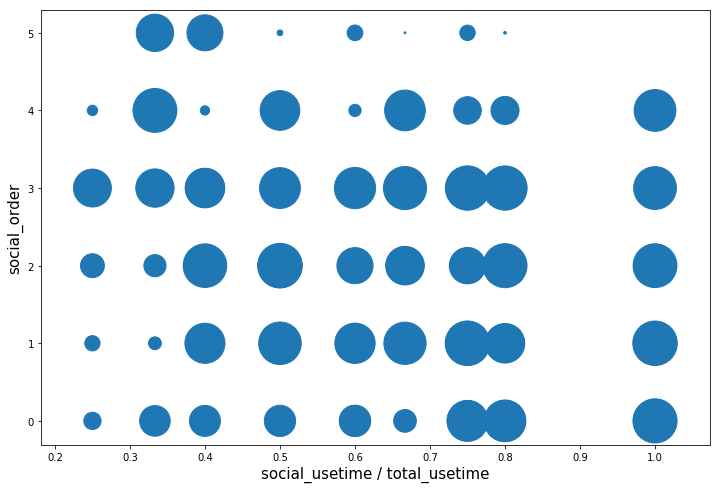

In [99]:
import matplotlib.pyplot as plt
from matplotlib import colors

plt.figure(figsize=(12, 8))
s = [n*n*n*n/200000000 for n in range(len(X_))]
plt.scatter(X_, y_, s = s)
plt.xlabel('social_usetime / total_usetime', fontsize=15)
plt.ylabel('social_order', fontsize=15)

In [ ]:
X = pd.concat([X, y['tol_111111']], axis=1)
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(X.corr(), annot=True)
plt.show()